<a href="https://colab.research.google.com/github/ujjwalbb30/Ujjwal_DATA606/blob/main/notebooks/Step_1_Basic_EDA_Ujjwal_PF10610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA 606 : Capstone Project**
##**Course Instructor: Dr. Chaojie Wang**
>**Data Science Department**

>**University of Maryland, Baltimore County**

###**Submitted By: Ujjwal**
>**UMBC ID: PF10610**

##**Basic EDA**

For the purpose of Basic EDA I will prepare a dataframe with visual features and textual features.

###**Installing Required Libraries**

In [1]:
# installing split-folders library to split the images dataset folders into training, validation and testing folders
!pip install split-folders

In [5]:
# installing pytessaract and tessaract OCR for reading texts form images
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

###**Importing Required Libraries**

In [8]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing other required libraries
import glob
import cv2
import skimage
from skimage.transform import resize
import os
import gc

import splitfolders
import pytesseract
import shutil
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image

###**Mounting the Drive and Copying the Data from Drive to Colab assigned machine**

From my previous experience, I have observed that copying the data to assigned colab machine helps in faster processing

In [4]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied
drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' -> '/content/Dataset'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE' -> '/content/Dataset/ADVE'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000136188.jpg' -> '/content/Dataset/ADVE/0000136188.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0030048095.jpg' -> '/content/Dataset/ADVE/0030048095.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000556056.jpg' -> '/content/Dataset/ADVE/0000556056.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04106546.jpg' -> '/content/Dataset/ADVE/04106546.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04102204.jpg' -> '/content/Dataset/ADVE/04102204.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04412344.jpg' -> '/content/Dataset/ADVE/04412344.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project

####**Reading texts from images and getting associated text**

In [15]:
# extracting text from a sample image
image_path = '/content/Dataset/Email/2063075627.jpg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path))

In [18]:
# viewing the extracted text from sample image
print('text from sample image is:\n',extractedInformation)
print('\nchecking the type of text extracted:\n',type(extractedInformation))

text from sample image is:
 Ellis, Cathy L. (WSA)

From: Hsu, Frank

Sent: Wednesday, March 24, 1999 10:58 AM
To: Ellis, Cathy L. (WSA)

Subject: RE: PLease review asap

Cathy, oO 0 o3 0 ex 7

My comments are in blue. It looks good!
Frank

AMNCIGTCORESTA-h
su.doe


checking the type of text extracted:
 <class 'str'>


In [21]:
# Preparing a dataset with all image labels and path

# defining the path to all images data folder
all_images_dataset_folder = '/content/Dataset'

# initializing an empty list to store paths and labels of images
all_images_data = []

# saving train images paths and labels
for folder in os.listdir(all_images_dataset_folder):
    label_folder = os.path.join(all_images_dataset_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_images_data += onlyfiles

# creating a dataframe from the lists
all_images_data_df = pd.DataFrame(all_images_data)

# viewing the details of all images dataframe
print('all images data:\n')
display(all_images_data_df)
print('\nunique labels:\n',all_images_data_df['label'].unique())
print('\n number of unique labels:\n',all_images_data_df['label'].nunique())
print('\nnumber of instances for each label:\n',all_images_data_df['label'].value_counts())

all images data:



,label,path
0,Memo,/content/Dataset/Memo/0000296750.jpg
1,Memo,/content/Dataset/Memo/04004176.jpg
2,Memo,/content/Dataset/Memo/2065322958.jpg
3,Memo,/content/Dataset/Memo/2010067199.jpg
4,Memo,/content/Dataset/Memo/633619.jpg
...,...,...
3487,Email,/content/Dataset/Email/2505229081a.jpg
3488,Email,/content/Dataset/Email/2085760833a.jpg
3489,Email,/content/Dataset/Email/2064850090a.jpg
3490,Email,/content/Dataset/Email/2085696767b.jpg



unique labels:
 ['Memo' 'Form' 'News' 'ADVE' 'Resume' 'Letter' 'Note' 'Report'
 'Scientific' 'Email']

 number of unique labels:
 10

number of instances for each label:
 Memo          621
Email         600
Letter        568
Form          432
Report        266
Scientific    262
ADVE          231
Note          202
News          189
Resume        121
Name: label, dtype: int64


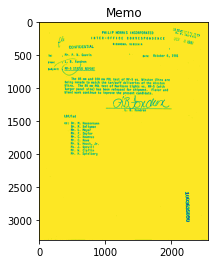

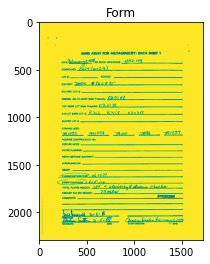

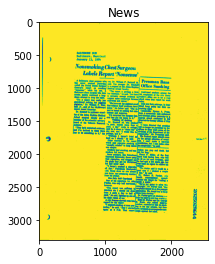

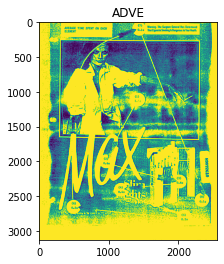

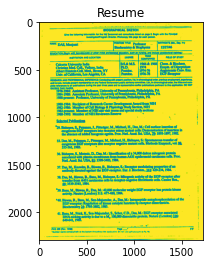

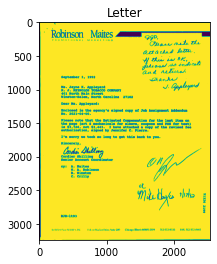

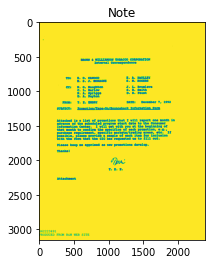

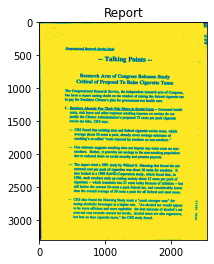

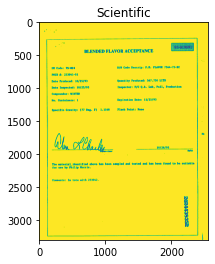

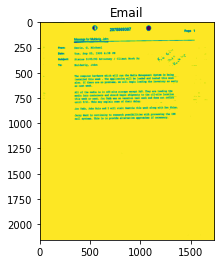

In [22]:
# viewing random images of each label from the all images dataframe

unique_images = all_images_data_df['label'].unique().tolist()
images = []

for sign in unique_images:
    rows = all_images_data_df[all_images_data_df['label']==sign]['path']
    random_pick = random.randint(a=0, b=len(rows))
    filepath = rows.iloc[random_pick]
    img = mpimg.imread(filepath)
    plt.figure()
    plt.title(sign)
    plt.imshow(img)

In [23]:
# extracting texts from each image and adding it as a row
# defining an empty list to store the text
image_texts = []
for index, row in all_images_data_df.iterrows():
  img_path = row['path']
  img_txt = pytesseract.image_to_string(Image.open(img_path))
  image_texts.append(img_txt)
display(image_texts)

KeyboardInterrupt: ignored

In [38]:
import multiprocessing

image_texts = []

def image_to_text(result_queue, pathSeq):
    for path in pathSeq:
      result_queue.put(pytesseract.image_to_string(Image.open(path)))

def image_multiprocessing():
    processs = []
    result_queue = multiprocessing.Queue()
    nbProc = 20

    for n in range(nbProc):
      process = multiprocessing.Process(target=image_to_text, args=[result_queue, all_images_data_df['path']])
      process.start()
      processs.append(process)
  
    for n in range(len(all_images_data_df['path'])):
      variable=result_queue.get()
      image_texts.append(variable)

    for process in processs:
      process.terminate()

    # finally print the result
    # print "Seq have a non black img: %s" % result
image_multiprocessing()

Process Process-111:
Process Process-123:
Process Process-114:
Process Process-119:
Process Process-121:
Process Process-124:
Process Process-116:
Process Process-118:
Process Process-122:
Process Process-113:
Process Process-120:
Process Process-107:
Process Process-106:
Process Process-112:
Process Process-125:
Process Process-108:
Process Process-117:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-109:
Process Process-110:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7

KeyboardInterrupt: ignored

  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-38-77507f1d25b8>", line 7, in image_to_text
    result_queue.put(pytesseract.image_to_string(Image.open(path)))
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/

In [41]:
print(image_texts)
print(len(image_texts))

[]
0


###**Splitting the images dataset folder into train, validation and test images**
###**creating train, validation and test dataframes of image paths and labels**

In [5]:
# splitting the folder intro training, validation and test dataset
splitfolders.ratio("/content/Dataset", output="/content/Dataset/split_dataset", seed=42, ratio=(.7, .1, .2), group_prefix=None)

Copying files: 3492 files [00:08, 402.17 files/s]


In [ ]:
# Exploring the new created split dataset folder
dataset_folder_path = '/content/Dataset/split_dataset'
for path, directories, files in os.walk(dataset_folder_path):
    print(path,'--> number of files : ', len(files))

/content/dataset/split_dataset --> number of files :  0
/content/dataset/split_dataset/test --> number of files :  0
/content/dataset/split_dataset/test/X --> number of files :  600
/content/dataset/split_dataset/test/J --> number of files :  600
/content/dataset/split_dataset/test/G --> number of files :  600
/content/dataset/split_dataset/test/D --> number of files :  600
/content/dataset/split_dataset/test/A --> number of files :  600
/content/dataset/split_dataset/test/R --> number of files :  600
/content/dataset/split_dataset/test/N --> number of files :  602
/content/dataset/split_dataset/test/T --> number of files :  600
/content/dataset/split_dataset/test/B --> number of files :  600
/content/dataset/split_dataset/test/H --> number of files :  600
/content/dataset/split_dataset/test/W --> number of files :  600
/content/dataset/split_dataset/test/E --> number of files :  600
/content/dataset/split_dataset/test/Q --> number of files :  600
/content/dataset/split_dataset/test/C 